# A Regressão Linear
- Se temos um conjunto de pontos como o mostrado abaixo, podemos traçar qualquer reta que passa por esses pontos
    - Nesse caso, vamos traçar uma reta y = x

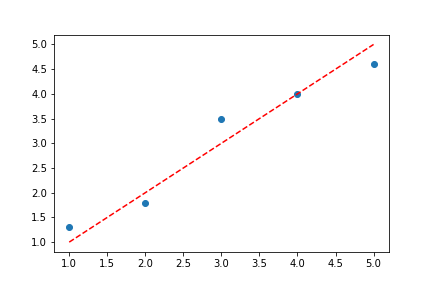


- Infinitas retas podem ser traçadas, mas qual seria <font color='blue'>**a melhor reta**</font> que passa por esses pontos?

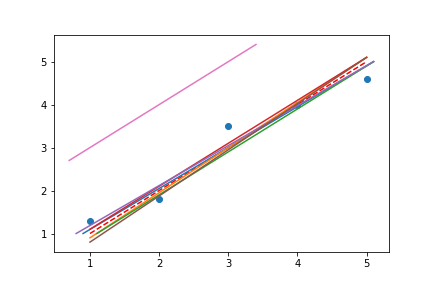



- <font color='blue'>**a melhor reta:**</font> o que seria "melhor"?
    - Para definir esse conceito podemos, por exemplo, verificar a distância de cada ponto a essa reta vermelha e escolher baseado nessa distância

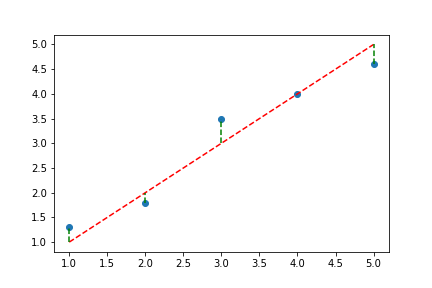

- A **regressão vai traçar essa reta de forma a <font color='blue'>minimizar a soma dos erros ao quadrado**</font>, segundo a própria documentação
    - https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares


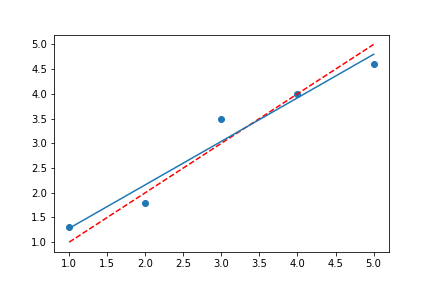


- LinearRegression fits a linear model with coefficients to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

https://www.youtube.com/watch?v=A0FtfcK6Rdc&list=PLpdAy0tYrnKw68i1Oo5oXairTtSmagbof&index=3

In [1]:
# Podemos considerar esses dados abaixo
import pandas as pd 

dados = pd.DataFrame({
    'X': [1,2,3,4,5],
    'Y': [1.3,1.8,3.5,4,4.6]
})

dados.head(2)

,X,Y
0,1,1.3
1,2,1.8


In [2]:
dados.head(3)

,X,Y
0,1,1.3
1,2,1.8
2,3,3.5


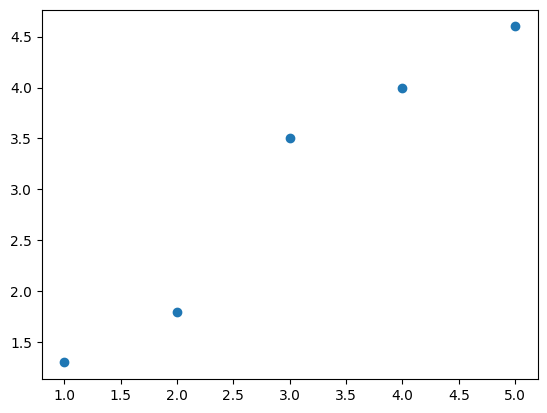

In [3]:
# Visualizando esses pontos graficamente, podemos traçar uma reta que passa por esse pontos
import matplotlib.pyplot as plt

fig,ax = plt.subplots()

ax.scatter(dados.X,dados.Y)


plt.show()

In [4]:
# Nessa reta vermelha, fizemos que y = x, então podemos escrever o y_reta como
dados['y_reta'] = dados.X

In [5]:
dados

,X,Y,y_reta
0,1,1.3,1
1,2,1.8,2
2,3,3.5,3
3,4,4.0,4
4,5,4.6,5


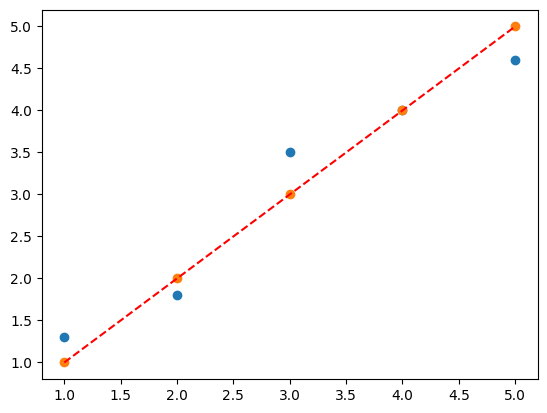

In [6]:
# Visualizando esses pontos graficamente, podemos traçar uma reta que passa por esse pontos
import matplotlib.pyplot as plt

fig,ax = plt.subplots()

ax.scatter(dados.X,dados.Y)
#reta
ax.plot(dados.X,dados.y_reta,'--r')
#ponto
ax.scatter(dados.X,dados.y_reta)

plt.show()

In [7]:
# Nessa reta vermelha, fizemos que y = x, então podemos escrever o y_reta como
#dados['y_reta'] = dados.X

# Regressão Linear

- **Vamos usar a regressão linear para traçar a melhor reta que passa por esses pontos**
    - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

In [8]:
# Importando a regressão linear
from sklearn.linear_model import LinearRegression

In [9]:
dados

,X,Y,y_reta
0,1,1.3,1
1,2,1.8,2
2,3,3.5,3
3,4,4.0,4
4,5,4.6,5


In [10]:
dados.X.values

array([1, 2, 3, 4, 5])

In [11]:
dados.X.values.reshape(-1, 1)

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [12]:
# colocar o 2D array values.reshape(-1, 1)
# Criando o regressor
reg = LinearRegression().fit(dados.X.values.reshape(-1, 1),dados.Y)

In [13]:
#reta tem coeficiente angular
reg.coef_

array([0.88])

In [14]:
# e o coeficiente linear
reg.intercept_

np.float64(0.40000000000000036)

In [15]:
# Visualizando o coeficiente angular
a = reg.coef_[0]
a

np.float64(0.8799999999999999)

In [16]:
# e o coeficiente linear
b = reg.intercept_
b

np.float64(0.40000000000000036)

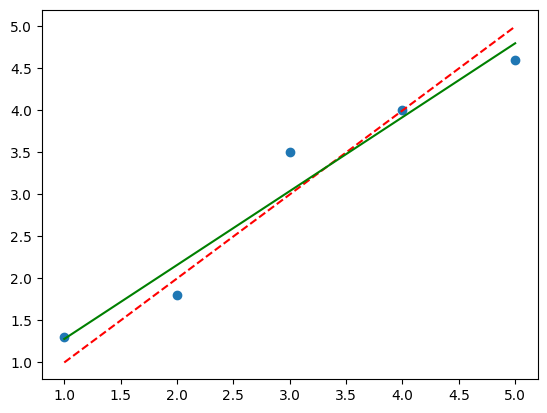

In [17]:
# Visualizando graficamente
fig,ax = plt.subplots()

ax.scatter(dados.X,dados.Y)
ax.plot(dados.X,dados.y_reta,'--r')

x = dados.X.values
y = a*x+b
ax.plot(x,y, color='green')

plt.show()

In [18]:
# Fazendo a previsão e adicionando na base
dados['y_pred'] = reg.predict(dados.X.values.reshape(-1,1))

In [19]:
display(dados)

,X,Y,y_reta,y_pred
0,1,1.3,1,1.28
1,2,1.8,2,2.16
2,3,3.5,3,3.04
3,4,4.0,4,3.92
4,5,4.6,5,4.80


In [24]:
# Calculando o erro da reta vermelha e da regressão
print((dados.Y - dados.y_reta)**2)
print((1.3-1)**2)
print((1.8-2)**2)

0    0.09
1    0.04
2    0.25
3    0.00
4    0.16
dtype: float64
0.09000000000000002
0.03999999999999998


In [27]:
print((dados.Y - dados.y_pred)**2)

0    0.0004
1    0.1296
2    0.2116
3    0.0064
4    0.0400
dtype: float64


In [25]:
# Calculando o erro da reta vermelha e da regressão
dados['erro_reta'] = (dados.Y - dados.y_reta)**2
dados['erro_pred'] = (dados.Y - dados.y_pred)**2

In [28]:
# Verificando essa base e a soma do erro -> qual melhor se adequa à reta
dados[['erro_reta','erro_pred']].sum()

erro_reta    0.540
erro_pred    0.388
dtype: float64

In [26]:
# Verificando essa base e a soma do erro
dados[['erro_reta','erro_pred']].mean()

erro_reta    0.1080
erro_pred    0.0776
dtype: float64

- Pdemos utilizar o erro médio absoluto e o erro médio quadrático do próprio scikit-learn para calcular esses erros
    - https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics

In [30]:
# Além disso, também podemos usar o erro médio absoluto e o erro médio quadrático do próprio scikit-learn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [36]:
# Visualizando o resultado da previsão
print(mean_absolute_error(dados.Y,dados.y_reta)) # mede a distância entre os pontos
print(mean_squared_error(dados.Y,dados.y_reta)) #  mede a distância entre os pontos e leve esse erro ao quadrado
print(mean_absolute_error(dados.Y,dados.y_pred))
print(mean_squared_error(dados.Y,dados.y_pred))
print('O erro quadratico e o absoluto no y pred ficou menor que o y reta. Assim, a reta criada (prevista) se ajusta melhor à reta')

0.2800000000000001
0.10800000000000005
0.22400000000000003
0.07760000000000003
O erro quadratico e o absoluto no y pred ficou menor que o y reta. Assim, a reta criada (prevista) se ajusta melhor à reta


https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_percentage_error.html#sklearn.metrics.mean_absolute_percentage_error

In [34]:

from sklearn.metrics import mean_absolute_percentage_error
#Mean absolute percentage error (MAPE) regression loss.
print(mean_absolute_percentage_error(dados.Y,dados.y_reta))
print(mean_absolute_percentage_error(dados.Y,dados.y_pred))

0.11433880129532306
0.0820582895365504


### Usando a Regressão Linear de forma prática
- **Vamos utilizar o dataset de casas da Califórnia**
    - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

# Coleta de dados 

In [38]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)
print(housing.feature_names[0:6])


(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


In [39]:
# Importando o dataset
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()

In [40]:
# Visualizando
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [41]:
# Transformando em um DataFrame
casas = pd.DataFrame(data.data)
casas.columns = data.feature_names
casas['MedHouseVal'] = data.target

In [42]:
# Visualizando o dataframe
casas

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


- **Regressão Linear Simples**

In [43]:
# Separando X e Y
X = casas.MedInc
y = casas.MedHouseVal

In [47]:
X

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: MedInc, Length: 20640, dtype: float64

In [48]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

- Separando nossa base em treino e teste para criarmos o modelo
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [49]:
# Separando em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [51]:
# Usando a regressão linear
#unica coluna precisa fazer o reshape
#regressor
reg = LinearRegression().fit(X_train.values.reshape(-1, 1),y_train)
reg

LinearRegression()

In [52]:
# Avaliando o erro, depois do preditor
y_pred = reg.predict(X_test.values.reshape(-1,1))

print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.6265986453094171
0.7028461448540977


In [54]:
y_train

5088     1.214
17096    3.637
5617     2.056
20060    0.476
895      2.360
         ...  
11284    2.292
11964    0.978
5390     2.221
860      2.835
15795    3.250
Name: MedHouseVal, Length: 13828, dtype: float64

In [55]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15316    1.66100
14772    0.93600
12870    1.07000
13476    1.30700
16123    3.07100
Name: MedHouseVal, Length: 6812, dtype: float64

In [56]:
y_pred

array([1.15039433, 1.50515684, 1.9011087 , ..., 2.04942371, 2.2832473 ,
       1.59354492])

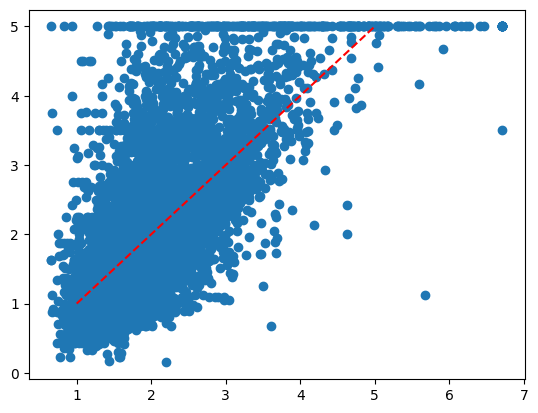

In [53]:
# Visualizando a relação do y_test com o y_pred
fig,ax = plt.subplots()

#previsto no eixo x e observado no eixo y
ax.scatter(y_pred,y_test)
ax.plot([1,5],[1,5],'--r')

plt.show()

<a id='linear_multipla'></a>
- **Regressão Linear Múltipla**

- Primeiro fazendo para apenas duas variáveis

In [60]:

# Separando X e Y
X= casas[['MedInc', 'AveBedrms']]
y = casas.MedHouseVal

In [61]:
# Separando em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [62]:
# Usando a regressão linear
reg = LinearRegression().fit(X_train,y_train)

In [63]:
# Da mesma forma, também vamos ter o coef_
reg.coef_

array([0.41732849, 0.00059442])

In [64]:
# E o intercept_
reg.intercept_

np.float64(0.4481074906325515)

In [65]:
# Avaliando o erro
y_pred = reg.predict(X_test)

#0.6265986453094171 antes e o valor de agora ficou pior, com apenas duas colunas
# 0.7028461448540977
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.6266005452778879
0.7028544349993665


In [67]:
y_pred

array([1.15032781, 1.50520053, 1.90115727, ..., 2.04938897, 2.28320277,
       1.59347723])

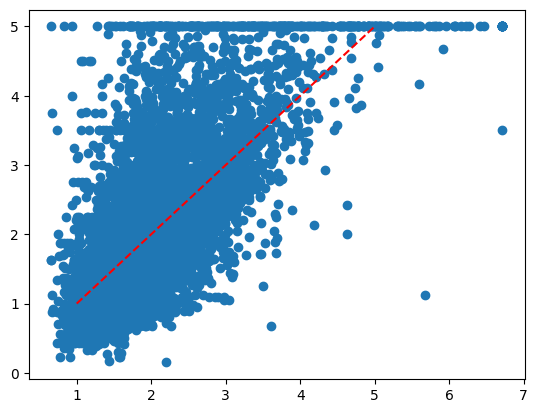

In [66]:
# Visualizando a relação do y_test com o y_pred
fig,ax = plt.subplots()

ax.scatter(y_pred,y_test)
ax.plot([1,5],[1,5],'--r')

plt.show()

#### analisar todas as colunas, X tiro a coluna y e ver todas as demais 

In [68]:
# Separando X e Y - axis 1 é coluna
X = casas.drop('MedHouseVal',axis=1)
y = casas.MedHouseVal

In [69]:
# Separando em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [70]:
# Usando a regressão linear
reg = LinearRegression().fit(X_train,y_train)

In [71]:
# Da mesma forma, também vamos ter o coef_
reg.coef_

array([ 4.44870466e-01,  9.55004561e-03, -1.21991503e-01,  7.79144696e-01,
       -7.68990809e-08, -3.29948505e-03, -4.19131153e-01, -4.34103468e-01])

In [72]:
# E o intercept_
reg.intercept_

np.float64(-37.082010939079986)

In [75]:
# Avaliando o erro
y_pred = reg.predict(X_test)
# o erro ficou menor que os erros anterior, abaixo de 0,54, o que ajudou na validação.
# pred, agora é uma reta que ajusta melhor nos nossos dados. 
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.5295710106684446
0.5369686543372453


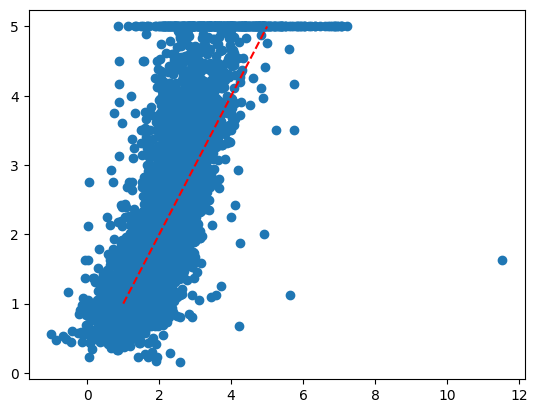

In [74]:
# Visualizando a relação do y_test com o y_pred
fig,ax = plt.subplots()

ax.scatter(y_pred,y_test)
ax.plot([1,5],[1,5],'--r') # ret apenas para comparar

plt.show()

- Podemos [voltar](#linear_multipla) e considerar qualquer coluna para o modelo